In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
import csv

In [7]:
igk_gen_seqs = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2BERT/humanness_score_AbnatiV/PLAbDab_human_healthy_full_diverse_beam_search_5_temp_0.2_max_length_150_early_stopping_true_batch_size_64_epochs_50_lr_0.0001_wd_0.1/abnativ_output_full/full_igk_gen_sequences_abnativ_seq_scores.csv"

igk_true_seqs = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2BERT/humanness_score_AbnatiV/PLAbDab_human_healthy_full_diverse_beam_search_5_temp_0.2_max_length_150_early_stopping_true_batch_size_64_epochs_50_lr_0.0001_wd_0.1/abnativ_output_full/full_igk_true_sequences_abnativ_seq_scores.csv"

with open(igk_gen_seqs, "r") as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)
        break

['', 'seq_id', 'input_seq', 'aligned_seq', 'AbNatiV VKappa Score', 'AbNatiV CDR1-VKappa Score', 'AbNatiV CDR2-VKappa Score', 'AbNatiV CDR3-VKappa Score', 'AbNatiV FR-VKappa Score']


/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Mean AbNatiV VKappa Score (Generated): 0.844560955930532
Mean AbNatiV VKappa Score (True): 0.7715601449626863
Median AbNatiV VKappa Score (Generated): 0.98885192657367
Median AbNatiV VKappa Score (True): 0.9319522635054094


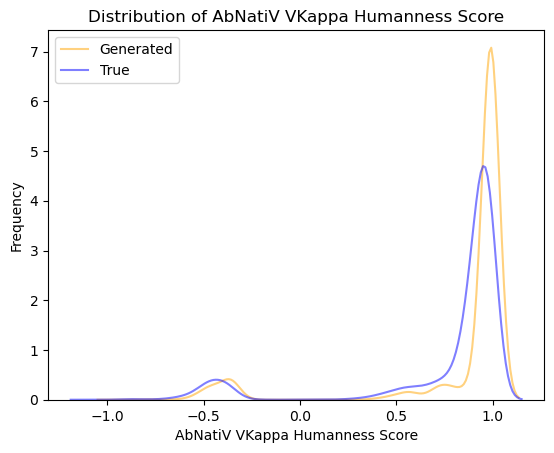

In [58]:
igk_gen_seqs_df = pd.read_csv(igk_gen_seqs)
igk_true_seqs_df = pd.read_csv(igk_true_seqs)

# extract AbNatiV VKappa Score
abnativ_vkappa_score_gen = igk_gen_seqs_df["AbNatiV VKappa Score"]
abnativ_vkappa_score_true = igk_true_seqs_df["AbNatiV VKappa Score"]


# plot histogram
sns.kdeplot(abnativ_vkappa_score_gen, alpha=0.5, color="orange")
sns.kdeplot(abnativ_vkappa_score_true, alpha=0.5, color="blue")
plt.legend(["Generated", "True"])
plt.xlabel("AbNatiV VKappa Humanness Score")
plt.ylabel("Frequency")
plt.title("Distribution of AbNatiV VKappa Humanness Score")

print("Mean AbNatiV VKappa Score (Generated):", statistics.mean(abnativ_vkappa_score_gen))
print("Mean AbNatiV VKappa Score (True):", statistics.mean(abnativ_vkappa_score_true))

print("Median AbNatiV VKappa Score (Generated):", statistics.median(abnativ_vkappa_score_gen))
print("Median AbNatiV VKappa Score (True):", statistics.median(abnativ_vkappa_score_true))


/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of AbNatiV VKappa Humanness Score')

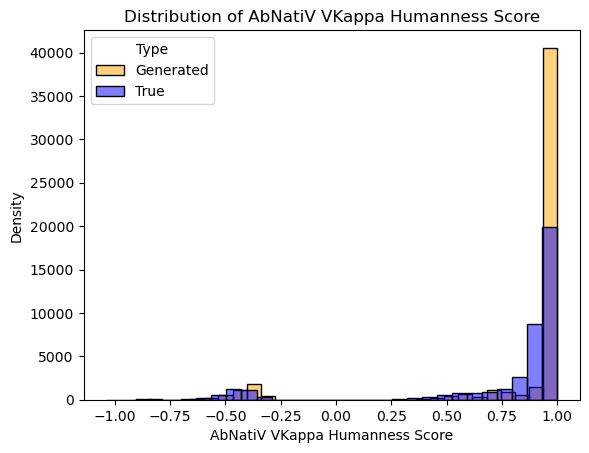

In [9]:
# Plot histogram with normalized frequency (density)
sns.histplot(abnativ_vkappa_score_gen, bins=30, alpha=0.5, color="orange", label="Generated")
sns.histplot(abnativ_vkappa_score_true, bins=30, alpha=0.5, color="blue", label="True")

# Add labels and legend
plt.legend(title="Type")
plt.xlabel("AbNatiV VKappa Humanness Score")
plt.ylabel("Density")
plt.title("Distribution of AbNatiV VKappa Humanness Score")

Is all numeric: False
Non-numeric values:
29990   NaN
31090   NaN
31724   NaN
31796   NaN
32333   NaN
32334   NaN
32388   NaN
32389   NaN
Name: AbNatiV CDR1-VKappa Score, dtype: float64
Mean AbNatiV CDR1-VKappa Score (Generated): 0.8253870734029414
Mean AbNatiV CDR1-VKappa Score (True): 0.6919233903288566
Median AbNatiV CDR1-VKappa Score (Generated): 0.9999121186302428
Median AbNatiV CDR1-VKappa Score (True): 0.9875910421698124


/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


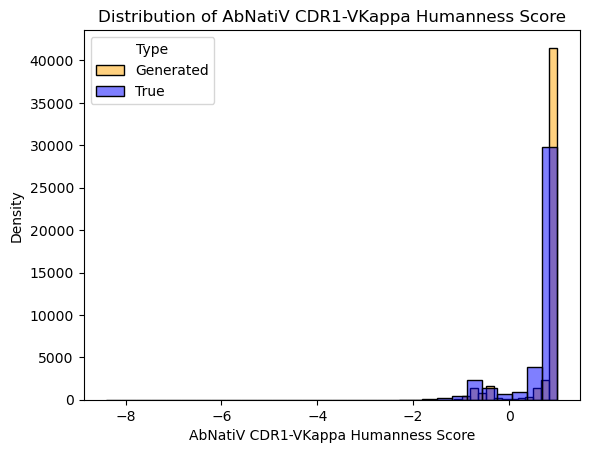

In [65]:
# extract AbNatiV VKappa Score
abnativ_vkappa_score_gen = igk_gen_seqs_df["AbNatiV CDR1-VKappa Score"]
abnativ_vkappa_score_true = igk_true_seqs_df["AbNatiV CDR1-VKappa Score"]

numeric_df = abnativ_vkappa_score_true.apply(pd.to_numeric, errors='coerce')
is_all_numeric = not numeric_df.isnull().values.any()
print("Is all numeric:", is_all_numeric)

if not is_all_numeric:
    print("Non-numeric values:")
    print(abnativ_vkappa_score_true[~numeric_df.notnull()])
    #remove non-numeric values
    abnativ_vkappa_score_true = abnativ_vkappa_score_true[numeric_df.notnull()]


# Plot histogram with normalized frequency (density)
fig, ax = plt.subplots()
sns.histplot(abnativ_vkappa_score_gen, bins=20, alpha=0.5, color="orange", label="Generated", ax=ax)
#ax.set_xlim(0.5, 1)
#ax.set_xticks(np.arange(0, 1.1, 0.1))
sns.histplot(abnativ_vkappa_score_true, bins=30, alpha=0.5, color="blue", label="True")

# Add labels and legend
plt.legend(title="Type")
plt.xlabel("AbNatiV CDR1-VKappa Humanness Score")
plt.ylabel("Density")
plt.title("Distribution of AbNatiV CDR1-VKappa Humanness Score")

print("Mean AbNatiV CDR1-VKappa Score (Generated):", statistics.mean(abnativ_vkappa_score_gen))
print("Mean AbNatiV CDR1-VKappa Score (True):", statistics.mean(abnativ_vkappa_score_true))

print("Median AbNatiV CDR1-VKappa Score (Generated):", statistics.median(abnativ_vkappa_score_gen))
print("Median AbNatiV CDR1-VKappa Score (True):", statistics.median(abnativ_vkappa_score_true))


/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of AbNatiV CDR1-VKappa Humanness Score')

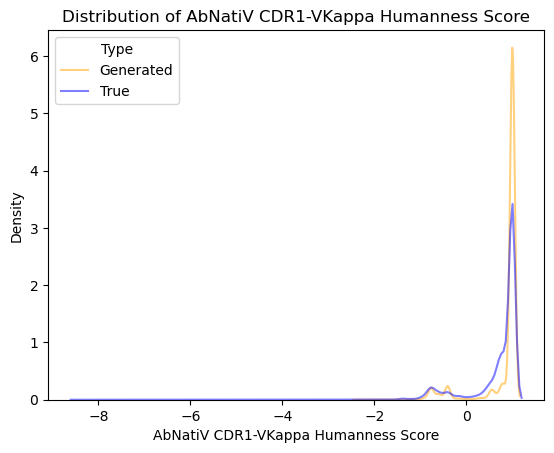

In [37]:
fig, ax = plt.subplots()
sns.kdeplot(abnativ_vkappa_score_gen, alpha=0.5, color="orange", label="Generated", ax=ax)
#ax.set_xlim(0.5, 1)
#ax.set_xticks(np.arange(0, 1.1, 0.1))
sns.kdeplot(abnativ_vkappa_score_true, alpha=0.5, color="blue", label="True")


# Add labels and legend
plt.legend(title="Type")
plt.xlabel("AbNatiV CDR1-VKappa Humanness Score")
plt.ylabel("Density")
plt.title("Distribution of AbNatiV CDR1-VKappa Humanness Score")

Is all numeric: False
Non-numeric values:
19323   NaN
Name: AbNatiV CDR2-VKappa Score, dtype: float64
Mean AbNatiV CDR2-VKappa Score (Generated): 0.8706434221031095
Mean AbNatiV CDR2-VKappa Score (True): 0.7843429217956591
Median AbNatiV CDR2-VKappa Score (Generated): 0.9999861125988652
Median AbNatiV CDR2-VKappa Score (True): 0.9991104208967728


/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


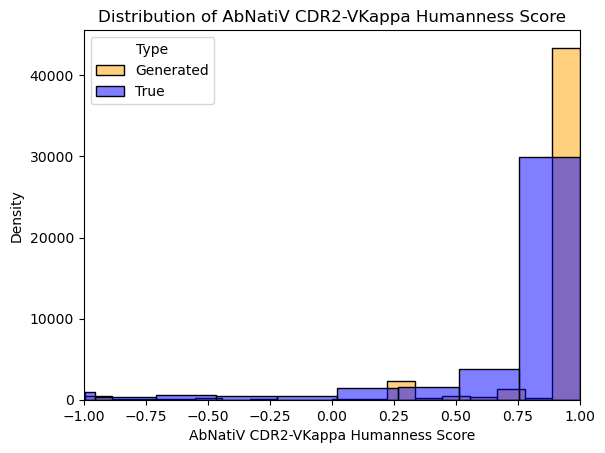

In [67]:
region="CDR2"

# extract AbNatiV VKappa Score
abnativ_vkappa_score_gen = igk_gen_seqs_df[f"AbNatiV {region}-VKappa Score"]
abnativ_vkappa_score_true = igk_true_seqs_df[f"AbNatiV {region}-VKappa Score"]

numeric_df = abnativ_vkappa_score_true.apply(pd.to_numeric, errors='coerce')
is_all_numeric = not numeric_df.isnull().values.any()
print("Is all numeric:", is_all_numeric)

if not is_all_numeric:
    print("Non-numeric values:")
    print(abnativ_vkappa_score_true[~numeric_df.notnull()])
    #remove non-numeric values
    abnativ_vkappa_score_true = abnativ_vkappa_score_true[numeric_df.notnull()]



# Plot histogram with normalized frequency (density)
fig, ax = plt.subplots()
sns.histplot(abnativ_vkappa_score_gen, bins=20, alpha=0.5, color="orange", label="Generated", ax=ax)
ax.set_xlim(-1, 1)
#ax.set_xticks(np.arange(0, 1.1, 0.1))
sns.histplot(abnativ_vkappa_score_true, bins=30, alpha=0.5, color="blue", label="True")

# Add labels and legend
plt.legend(title="Type")
plt.xlabel(f"AbNatiV {region}-VKappa Humanness Score")
plt.ylabel("Density")
plt.title(f"Distribution of AbNatiV {region}-VKappa Humanness Score")

print(f"Mean AbNatiV {region}-VKappa Score (Generated):", statistics.mean(abnativ_vkappa_score_gen))
print(f"Mean AbNatiV {region}-VKappa Score (True):", statistics.mean(abnativ_vkappa_score_true))

print(f"Median AbNatiV {region}-VKappa Score (Generated):", statistics.median(abnativ_vkappa_score_gen))
print(f"Median AbNatiV {region}-VKappa Score (True):", statistics.median(abnativ_vkappa_score_true))


/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of AbNatiV CDR2-VKappa Humanness Score')

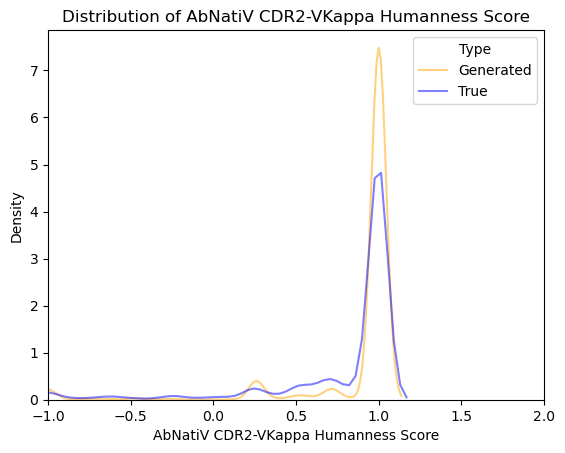

In [46]:
region="CDR2"

# extract AbNatiV VKappa Score
abnativ_vkappa_score_gen = igk_gen_seqs_df[f"AbNatiV {region}-VKappa Score"]
abnativ_vkappa_score_true = igk_true_seqs_df[f"AbNatiV {region}-VKappa Score"]


# Plot histogram with normalized frequency (density)
fig, ax = plt.subplots()
sns.kdeplot(abnativ_vkappa_score_gen, alpha=0.5, color="orange", label="Generated", ax=ax)
ax.set_xlim(-1, 2)
#ax.set_xticks(np.arange(0, 1.1, 0.1))
sns.kdeplot(abnativ_vkappa_score_true, alpha=0.5, color="blue", label="True")

# Add labels and legend
plt.legend(title="Type")
plt.xlabel(f"AbNatiV {region}-VKappa Humanness Score")
plt.ylabel("Density")
plt.title(f"Distribution of AbNatiV {region}-VKappa Humanness Score")

Is all numeric: False
Non-numeric values:
651     NaN
2879    NaN
4016    NaN
4030    NaN
5622    NaN
         ..
39537   NaN
39582   NaN
39585   NaN
39647   NaN
39648   NaN
Name: AbNatiV CDR3-VKappa Score, Length: 432, dtype: float64
Is all numeric: False
Non-numeric values:
38142   NaN
38575   NaN
38842   NaN
38843   NaN
38844   NaN
         ..
49621   NaN
49624   NaN
49628   NaN
50001   NaN
50111   NaN
Name: AbNatiV CDR3-VKappa Score, Length: 165, dtype: float64
Mean AbNatiV CDR3-VKappa Score (Generated): 0.7480871618771419
Mean AbNatiV CDR3-VKappa Score (True): 0.5245450241732316
Median AbNatiV CDR3-VKappa Score (Generated): 0.8668600957794887
Median AbNatiV CDR3-VKappa Score (True): 0.6351194737205024


/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


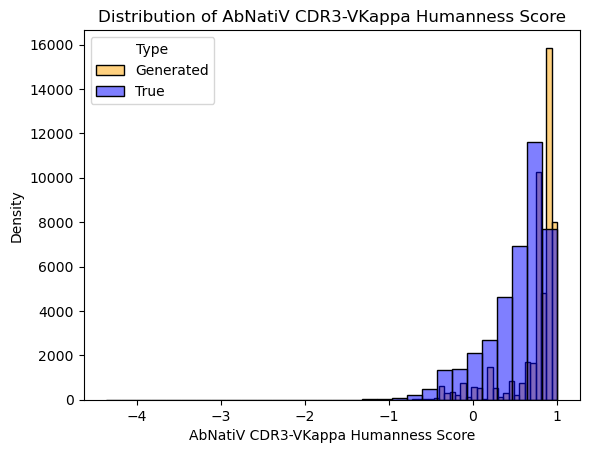

In [70]:
region="CDR3"

# extract AbNatiV VKappa Score
abnativ_vkappa_score_gen = igk_gen_seqs_df[f"AbNatiV {region}-VKappa Score"]
abnativ_vkappa_score_true = igk_true_seqs_df[f"AbNatiV {region}-VKappa Score"]

numeric_df = abnativ_vkappa_score_true.apply(pd.to_numeric, errors='coerce')
is_all_numeric = not numeric_df.isnull().values.any()
print("Is all numeric:", is_all_numeric)

if not is_all_numeric:
    print("Non-numeric values:")
    print(abnativ_vkappa_score_true[~numeric_df.notnull()])
    #remove non-numeric values
    abnativ_vkappa_score_true = abnativ_vkappa_score_true[numeric_df.notnull()]

numeric_df = abnativ_vkappa_score_gen.apply(pd.to_numeric, errors='coerce')
is_all_numeric = not numeric_df.isnull().values.any()
print("Is all numeric:", is_all_numeric)

if not is_all_numeric:
    print("Non-numeric values:")
    print(abnativ_vkappa_score_gen[~numeric_df.notnull()])
    #remove non-numeric values
    abnativ_vkappa_score_gen = abnativ_vkappa_score_gen[numeric_df.notnull()]


# Plot histogram with normalized frequency (density)
fig, ax = plt.subplots()
sns.histplot(abnativ_vkappa_score_gen, bins=30, alpha=0.5, color="orange", label="Generated", ax=ax)
#ax.set_xlim(0.5, 1)
#ax.set_xticks(np.arange(0, 1.1, 0.1))
sns.histplot(abnativ_vkappa_score_true, bins=30, alpha=0.5, color="blue", label="True")

# Add labels and legend
plt.legend(title="Type")
plt.xlabel(f"AbNatiV {region}-VKappa Humanness Score")
plt.ylabel("Density")
plt.title(f"Distribution of AbNatiV {region}-VKappa Humanness Score")

print(f"Mean AbNatiV {region}-VKappa Score (Generated):", statistics.mean(abnativ_vkappa_score_gen))
print(f"Mean AbNatiV {region}-VKappa Score (True):", statistics.mean(abnativ_vkappa_score_true))

print(f"Median AbNatiV {region}-VKappa Score (Generated):", statistics.median(abnativ_vkappa_score_gen))
print(f"Median AbNatiV {region}-VKappa Score (True):", statistics.median(abnativ_vkappa_score_true))

/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of AbNatiV CDR3-VKappa Humanness Score')

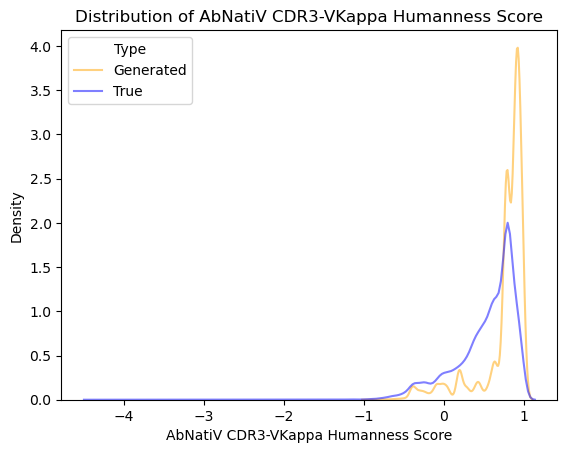

In [47]:
region="CDR3"

# extract AbNatiV VKappa Score
abnativ_vkappa_score_gen = igk_gen_seqs_df[f"AbNatiV {region}-VKappa Score"]
abnativ_vkappa_score_true = igk_true_seqs_df[f"AbNatiV {region}-VKappa Score"]


# Plot histogram with normalized frequency (density)
fig, ax = plt.subplots()
sns.kdeplot(abnativ_vkappa_score_gen, alpha=0.5, color="orange", label="Generated", ax=ax)
#ax.set_xlim(0.5, 1)
#ax.set_xticks(np.arange(0, 1.1, 0.1))
sns.kdeplot(abnativ_vkappa_score_true, alpha=0.5, color="blue", label="True")

# Add labels and legend
plt.legend(title="Type")
plt.xlabel(f"AbNatiV {region}-VKappa Humanness Score")
plt.ylabel("Density")
plt.title(f"Distribution of AbNatiV {region}-VKappa Humanness Score")

Is all numeric: True
Is all numeric: True
Mean AbNatiV FR-VKappa Score (Generated): 0.8553216540188371
Mean AbNatiV FR-VKappa Score (True): 0.8044970343663047
Median AbNatiV FR-VKappa Score (Generated): 0.9994663555345228
Median AbNatiV FR-VKappa Score (True): 0.966865229801117


/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


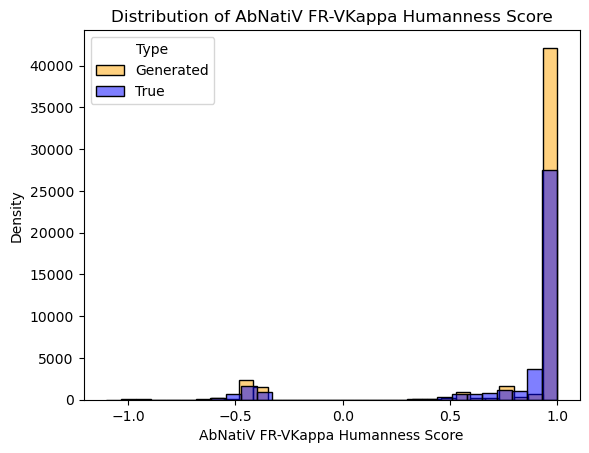

In [72]:
region="FR"

# extract AbNatiV VKappa Score
abnativ_vkappa_score_gen = igk_gen_seqs_df[f"AbNatiV {region}-VKappa Score"]
abnativ_vkappa_score_true = igk_true_seqs_df[f"AbNatiV {region}-VKappa Score"]

numeric_df = abnativ_vkappa_score_true.apply(pd.to_numeric, errors='coerce')
is_all_numeric = not numeric_df.isnull().values.any()
print("Is all numeric:", is_all_numeric)

if not is_all_numeric:
    print("Non-numeric values:")
    print(abnativ_vkappa_score_true[~numeric_df.notnull()])
    #remove non-numeric values
    abnativ_vkappa_score_true = abnativ_vkappa_score_true[numeric_df.notnull()]

numeric_df = abnativ_vkappa_score_gen.apply(pd.to_numeric, errors='coerce')
is_all_numeric = not numeric_df.isnull().values.any()
print("Is all numeric:", is_all_numeric)

if not is_all_numeric:
    print("Non-numeric values:")
    print(abnativ_vkappa_score_gen[~numeric_df.notnull()])
    #remove non-numeric values
    abnativ_vkappa_score_gen = abnativ_vkappa_score_gen[numeric_df.notnull()]


# Plot histogram with normalized frequency (density)
fig, ax = plt.subplots()
sns.histplot(abnativ_vkappa_score_gen, bins=30, alpha=0.5, color="orange", label="Generated", ax=ax)
#ax.set_xlim(0.5, 1)
#ax.set_xticks(np.arange(0, 1.1, 0.1))
sns.histplot(abnativ_vkappa_score_true, bins=30, alpha=0.5, color="blue", label="True")

# Add labels and legend
plt.legend(title="Type")
plt.xlabel(f"AbNatiV {region}-VKappa Humanness Score")
plt.ylabel("Density")
plt.title(f"Distribution of AbNatiV {region}-VKappa Humanness Score")

print(f"Mean AbNatiV {region}-VKappa Score (Generated):", statistics.mean(abnativ_vkappa_score_gen))
print(f"Mean AbNatiV {region}-VKappa Score (True):", statistics.mean(abnativ_vkappa_score_true))

print(f"Median AbNatiV {region}-VKappa Score (Generated):", statistics.median(abnativ_vkappa_score_gen))
print(f"Median AbNatiV {region}-VKappa Score (True):", statistics.median(abnativ_vkappa_score_true))


Is all numeric: True
Is all numeric: True


/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Mean AbNatiV FR-VKappa Score (Generated): 0.8553216540188371
Mean AbNatiV FR-VKappa Score (True): 0.8044970343663047
Median AbNatiV FR-VKappa Score (Generated): 0.9994663555345228
Median AbNatiV FR-VKappa Score (True): 0.966865229801117


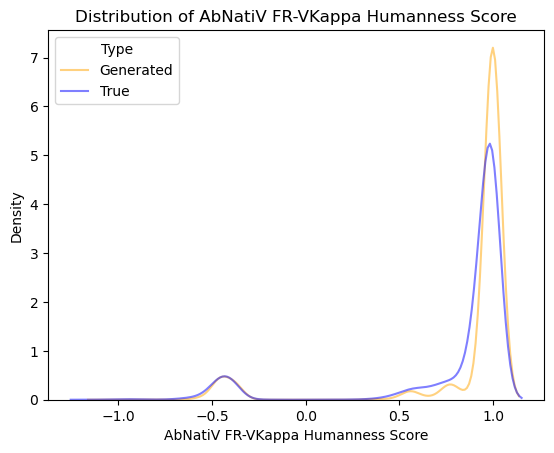

In [73]:
region="FR"

# extract AbNatiV VKappa Score
abnativ_vkappa_score_gen = igk_gen_seqs_df[f"AbNatiV {region}-VKappa Score"]
abnativ_vkappa_score_true = igk_true_seqs_df[f"AbNatiV {region}-VKappa Score"]

numeric_df = abnativ_vkappa_score_true.apply(pd.to_numeric, errors='coerce')
is_all_numeric = not numeric_df.isnull().values.any()
print("Is all numeric:", is_all_numeric)

if not is_all_numeric:
    print("Non-numeric values:")
    print(abnativ_vkappa_score_true[~numeric_df.notnull()])
    #remove non-numeric values
    abnativ_vkappa_score_true = abnativ_vkappa_score_true[numeric_df.notnull()]

numeric_df = abnativ_vkappa_score_gen.apply(pd.to_numeric, errors='coerce')
is_all_numeric = not numeric_df.isnull().values.any()
print("Is all numeric:", is_all_numeric)

if not is_all_numeric:
    print("Non-numeric values:")
    print(abnativ_vkappa_score_gen[~numeric_df.notnull()])
    #remove non-numeric values
    abnativ_vkappa_score_gen = abnativ_vkappa_score_gen[numeric_df.notnull()]


# Plot histogram with normalized frequency (density)
fig, ax = plt.subplots()
sns.kdeplot(abnativ_vkappa_score_gen, alpha=0.5, color="orange", label="Generated", ax=ax)
#ax.set_xlim(0.5, 1)
#ax.set_xticks(np.arange(0, 1.1, 0.1))
sns.kdeplot(abnativ_vkappa_score_true, alpha=0.5, color="blue", label="True")

# Add labels and legend
plt.legend(title="Type")
plt.xlabel(f"AbNatiV {region}-VKappa Humanness Score")
plt.ylabel("Density")
plt.title(f"Distribution of AbNatiV {region}-VKappa Humanness Score")

print(f"Mean AbNatiV {region}-VKappa Score (Generated):", statistics.mean(abnativ_vkappa_score_gen))
print(f"Mean AbNatiV {region}-VKappa Score (True):", statistics.mean(abnativ_vkappa_score_true))

print(f"Median AbNatiV {region}-VKappa Score (Generated):", statistics.median(abnativ_vkappa_score_gen))
print(f"Median AbNatiV {region}-VKappa Score (True):", statistics.median(abnativ_vkappa_score_true))


Is all numeric: True
Is all numeric: True
Mean AbNatiV VLambda Score (Generated): 0.9779911299745864
Mean AbNatiV VLambda Score (True): 0.9369318807734344
Median AbNatiV VLambda Score (Generated): 0.97846374535489
Median AbNatiV VLambda Score (True): 0.9606391984286176


/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


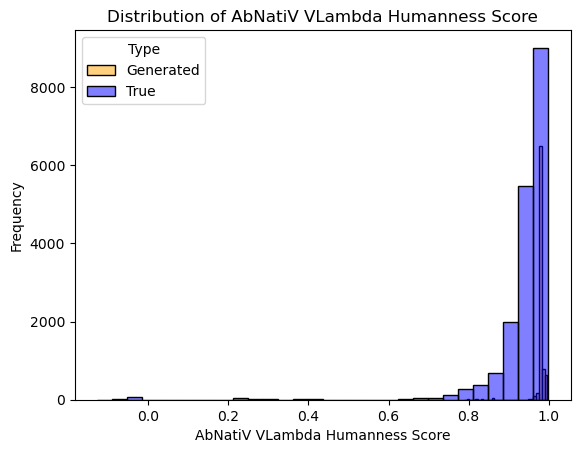

In [75]:
igl_gen_seqs = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2BERT/humanness_score_AbnatiV/PLAbDab_human_healthy_full_diverse_beam_search_5_temp_0.2_max_length_150_early_stopping_true_batch_size_64_epochs_50_lr_0.0001_wd_0.1/abnativ_output_full/full_igl_gen_sequences_abnativ_seq_scores.csv"

igl_true_seqs = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2BERT/humanness_score_AbnatiV/PLAbDab_human_healthy_full_diverse_beam_search_5_temp_0.2_max_length_150_early_stopping_true_batch_size_64_epochs_50_lr_0.0001_wd_0.1/abnativ_output_full/full_igl_true_sequences_abnativ_seq_scores.csv"

igl_gen_seqs_df = pd.read_csv(igl_gen_seqs)
igl_true_seqs_df = pd.read_csv(igl_true_seqs)

# extract AbNatiV Score
abnativ_vlambda_score_gen = igl_gen_seqs_df["AbNatiV VLambda Score"]
abnativ_vlambda_score_true = igl_true_seqs_df["AbNatiV VLambda Score"]

numeric_df = abnativ_vlambda_score_true.apply(pd.to_numeric, errors='coerce')
is_all_numeric = not numeric_df.isnull().values.any()
print("Is all numeric:", is_all_numeric)

if not is_all_numeric:
    print("Non-numeric values:")
    print(abnativ_vlambda_score_true[~numeric_df.notnull()])
    #remove non-numeric values
    abnativ_vlambda_score_true = abnativ_vlambda_score_true[numeric_df.notnull()]

numeric_df = abnativ_vlambda_score_gen.apply(pd.to_numeric, errors='coerce')
is_all_numeric = not numeric_df.isnull().values.any()
print("Is all numeric:", is_all_numeric)

if not is_all_numeric:
    print("Non-numeric values:")
    print(abnativ_vlambda_score_gen[~numeric_df.notnull()])
    #remove non-numeric values
    abnativ_vlambda_score_gen = abnativ_vlambda_score_gen[numeric_df.notnull()]


# Plot histogram with normalized frequency (density)
sns.histplot(abnativ_vlambda_score_gen, bins=30, alpha=0.5, color="orange", label="Generated")
sns.histplot(abnativ_vlambda_score_true, bins=30, alpha=0.5, color="blue", label="True")

# Add labels and legend
plt.legend(title="Type")
plt.xlabel("AbNatiV VLambda Humanness Score")
plt.ylabel("Frequency")
plt.title("Distribution of AbNatiV VLambda Humanness Score")

print("Mean AbNatiV VLambda Score (Generated):", statistics.mean(abnativ_vlambda_score_gen))
print("Mean AbNatiV VLambda Score (True):", statistics.mean(abnativ_vlambda_score_true))

print("Median AbNatiV VLambda Score (Generated):", statistics.median(abnativ_vlambda_score_gen))
print("Median AbNatiV VLambda Score (True):", statistics.median(abnativ_vlambda_score_true))


/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of AbNatiV VLambda Humanness Score')

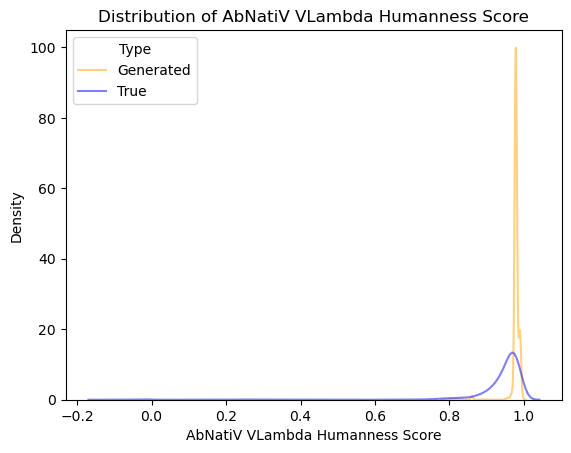

In [26]:
igl_gen_seqs = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2BERT/humanness_score_AbnatiV/PLAbDab_human_healthy_full_diverse_beam_search_5_temp_0.2_max_length_150_early_stopping_true_batch_size_64_epochs_50_lr_0.0001_wd_0.1/abnativ_output_full/full_igl_gen_sequences_abnativ_seq_scores.csv"

igl_true_seqs = "/ibmm_data2/oas_database/paired_lea_tmp/paired_model/BERT2BERT/humanness_score_AbnatiV/PLAbDab_human_healthy_full_diverse_beam_search_5_temp_0.2_max_length_150_early_stopping_true_batch_size_64_epochs_50_lr_0.0001_wd_0.1/abnativ_output_full/full_igl_true_sequences_abnativ_seq_scores.csv"

igl_gen_seqs_df = pd.read_csv(igl_gen_seqs)
igl_true_seqs_df = pd.read_csv(igl_true_seqs)

# extract AbNatiV Score
abnativ_vlambda_score_gen = igl_gen_seqs_df["AbNatiV VLambda Score"]
abnativ_vlambda_score_true = igl_true_seqs_df["AbNatiV VLambda Score"]


# Plot histogram with normalized frequency (density)
sns.kdeplot(abnativ_vlambda_score_gen, alpha=0.5, color="orange", label="Generated")
sns.kdeplot(abnativ_vlambda_score_true, alpha=0.5, color="blue", label="True")

# Add labels and legend
plt.legend(title="Type")
plt.xlabel("AbNatiV VLambda Humanness Score")
plt.ylabel("Density")
plt.title("Distribution of AbNatiV VLambda Humanness Score")

Is all numeric: False
Non-numeric values:
2281    NaN
3487    NaN
5226    NaN
6393    NaN
6847    NaN
         ..
18213   NaN
18214   NaN
18215   NaN
18216   NaN
18217   NaN
Name: AbNatiV CDR1-VLambda Score, Length: 125, dtype: float64
Is all numeric: True
Mean AbNatiV CDR1-VLambda Score (Generated): 0.9922917128043381
Mean AbNatiV CDR1-VLambda Score (True): 0.9205700928573686
Median AbNatiV CDR1-VLambda Score (Generated): 0.9999547660755344
Median AbNatiV CDR1-VLambda Score (True): 0.9974438822555344


/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


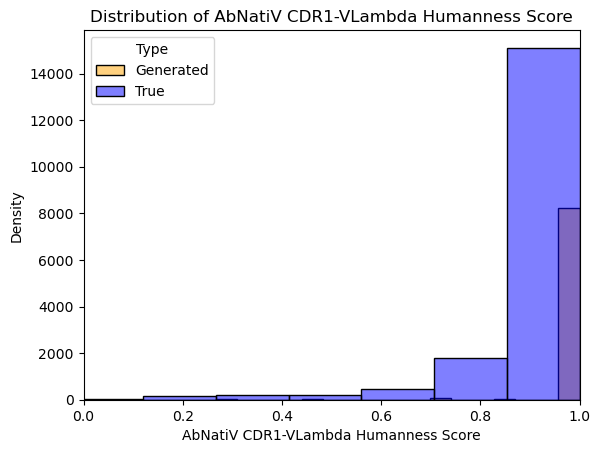

In [76]:
region="CDR1"

# extract AbNatiV VKappa Score
abnativ_vlambda_score_gen = igl_gen_seqs_df[f"AbNatiV {region}-VLambda Score"]
abnativ_vlambda_score_true = igl_true_seqs_df[f"AbNatiV {region}-VLambda Score"]

numeric_df = abnativ_vlambda_score_true.apply(pd.to_numeric, errors='coerce')
is_all_numeric = not numeric_df.isnull().values.any()
print("Is all numeric:", is_all_numeric)

if not is_all_numeric:
    print("Non-numeric values:")
    print(abnativ_vlambda_score_true[~numeric_df.notnull()])
    #remove non-numeric values
    abnativ_vlambda_score_true = abnativ_vlambda_score_true[numeric_df.notnull()]

numeric_df = abnativ_vlambda_score_gen.apply(pd.to_numeric, errors='coerce')
is_all_numeric = not numeric_df.isnull().values.any()
print("Is all numeric:", is_all_numeric)

if not is_all_numeric:
    print("Non-numeric values:")
    print(abnativ_vlambda_score_gen[~numeric_df.notnull()])
    #remove non-numeric values
    abnativ_vlambda_score_gen = abnativ_vlambda_score_gen[numeric_df.notnull()]


# Plot histogram with normalized frequency (density)
fig, ax = plt.subplots()
sns.histplot(abnativ_vlambda_score_gen, bins=30, alpha=0.5, color="orange", label="Generated", ax=ax)
ax.set_xlim(0, 1)
#ax.set_xticks(np.arange(0, 1.1, 0.1))
sns.histplot(abnativ_vlambda_score_true, bins=30, alpha=0.5, color="blue", label="True")

# Add labels and legend
plt.legend(title="Type")
plt.xlabel(f"AbNatiV {region}-VLambda Humanness Score")
plt.ylabel("Density")
plt.title(f"Distribution of AbNatiV {region}-VLambda Humanness Score")

print(f"Mean AbNatiV {region}-VLambda Score (Generated):", statistics.mean(abnativ_vlambda_score_gen))
print(f"Mean AbNatiV {region}-VLambda Score (True):", statistics.mean(abnativ_vlambda_score_true))

print(f"Median AbNatiV {region}-VLambda Score (Generated):", statistics.median(abnativ_vlambda_score_gen))
print(f"Median AbNatiV {region}-VLambda Score (True):", statistics.median(abnativ_vlambda_score_true))


/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of AbNatiV CDR1-VLambda Humanness Score')

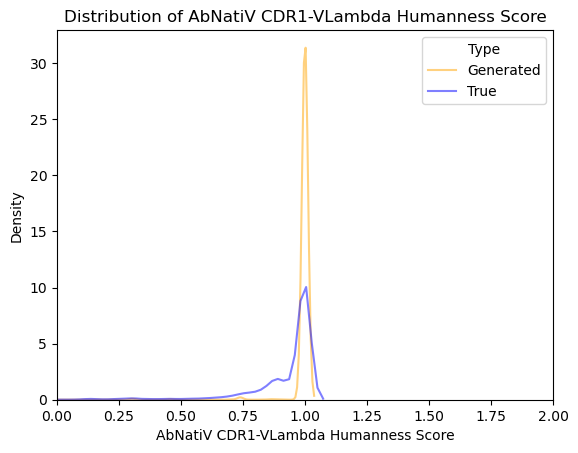

In [56]:
region="CDR1"

# extract AbNatiV VKappa Score
abnativ_vlambda_score_gen = igl_gen_seqs_df[f"AbNatiV {region}-VLambda Score"]
abnativ_vlambda_score_true = igl_true_seqs_df[f"AbNatiV {region}-VLambda Score"]


# Plot histogram with normalized frequency (density)
fig, ax = plt.subplots()
sns.kdeplot(abnativ_vlambda_score_gen, alpha=0.5, color="orange", label="Generated", ax=ax)
ax.set_xlim(0, 2)
#ax.set_xticks(np.arange(0, 1.1, 0.1))
sns.kdeplot(abnativ_vlambda_score_true, alpha=0.5, color="blue", label="True")

# Add labels and legend
plt.legend(title="Type")
plt.xlabel(f"AbNatiV {region}-VLambda Humanness Score")
plt.ylabel("Density")
plt.title(f"Distribution of AbNatiV {region}-VLambda Humanness Score")

Is all numeric: True
Is all numeric: True
Mean AbNatiV CDR2-VLambda Score (Generated): 0.9993952622055852
Mean AbNatiV CDR2-VLambda Score (True): 0.9525337015502987
Median AbNatiV CDR2-VLambda Score (Generated): 0.9999905753775998
Median AbNatiV CDR2-VLambda Score (True): 0.9994987176191849


/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


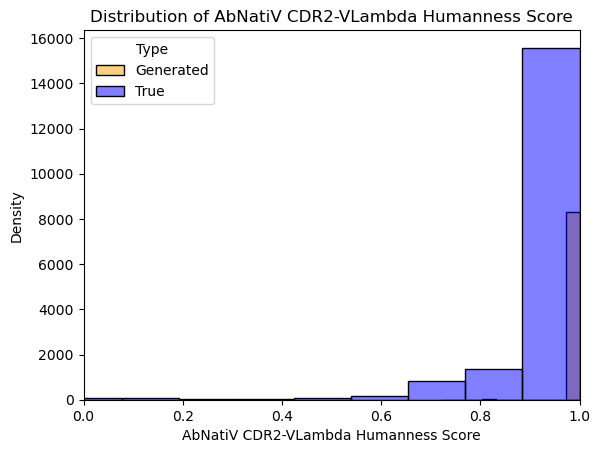

In [ ]:
region="CDR2"

# extract AbNatiV VKappa Score
abnativ_vlambda_score_gen = igl_gen_seqs_df[f"AbNatiV {region}-VLambda Score"]
abnativ_vlambda_score_true = igl_true_seqs_df[f"AbNatiV {region}-VLambda Score"]

numeric_df = abnativ_vlambda_score_true.apply(pd.to_numeric, errors='coerce')
is_all_numeric = not numeric_df.isnull().values.any()
print("Is all numeric:", is_all_numeric)

if not is_all_numeric:
    print("Non-numeric values:")
    print(abnativ_vlambda_score_true[~numeric_df.notnull()])
    #remove non-numeric values
    abnativ_vlambda_score_true = abnativ_vlambda_score_true[numeric_df.notnull()]

numeric_df = abnativ_vlambda_score_gen.apply(pd.to_numeric, errors='coerce')
is_all_numeric = not numeric_df.isnull().values.any()
print("Is all numeric:", is_all_numeric)

if not is_all_numeric:
    print("Non-numeric values:")
    print(abnativ_vlambda_score_gen[~numeric_df.notnull()])
    #remove non-numeric values
    abnativ_vlambda_score_gen = abnativ_vlambda_score_gen[numeric_df.notnull()]


# Plot histogram with normalized frequency (density)
fig, ax = plt.subplots()
sns.histplot(abnativ_vlambda_score_gen, bins=10, alpha=0.5, color="orange", label="Generated", ax=ax)
ax.set_xlim(0, 1)
#ax.set_xticks(np.arange(0, 1.1, 0.1))
sns.histplot(abnativ_vlambda_score_true, bins=30, alpha=0.5, color="blue", label="True")

# Add labels and legend
plt.legend(title="Type")
plt.xlabel(f"AbNatiV {region}-VLambda Humanness Score")
plt.ylabel("Density")
plt.title(f"Distribution of AbNatiV {region}-VLambda Humanness Score")

print(f"Mean AbNatiV {region}-VLambda Score (Generated):", statistics.mean(abnativ_vlambda_score_gen))
print(f"Mean AbNatiV {region}-VLambda Score (True):", statistics.mean(abnativ_vlambda_score_true))

print(f"Median AbNatiV {region}-VLambda Score (Generated):", statistics.median(abnativ_vlambda_score_gen))
print(f"Median AbNatiV {region}-VLambda Score (True):", statistics.median(abnativ_vlambda_score_true))


Is all numeric: False
Non-numeric values:
8       NaN
31      NaN
48      NaN
62      NaN
68      NaN
         ..
17551   NaN
17612   NaN
17668   NaN
17701   NaN
17833   NaN
Name: AbNatiV CDR3-VLambda Score, Length: 356, dtype: float64
Is all numeric: False
Non-numeric values:
7322   NaN
Name: AbNatiV CDR3-VLambda Score, dtype: float64
Mean AbNatiV CDR3-VLambda Score (Generated): 0.9676352018509808
Mean AbNatiV CDR3-VLambda Score (True): 0.788031416684876
Median AbNatiV CDR3-VLambda Score (Generated): 0.9688534179376536
Median AbNatiV CDR3-VLambda Score (True): 0.8370944526458857


/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


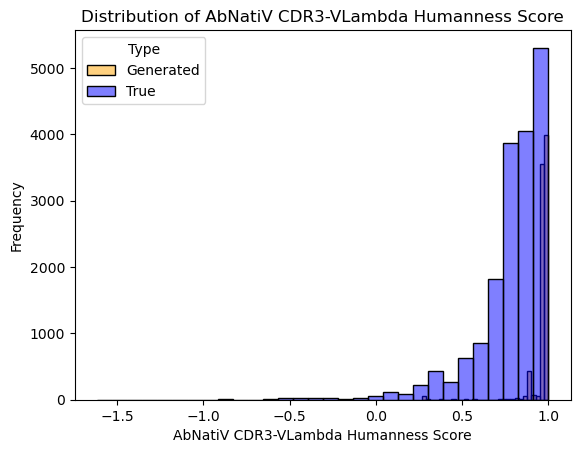

In [78]:
region="CDR3"

# extract AbNatiV VKappa Score
abnativ_vlambda_score_gen = igl_gen_seqs_df[f"AbNatiV {region}-VLambda Score"]
abnativ_vlambda_score_true = igl_true_seqs_df[f"AbNatiV {region}-VLambda Score"]

numeric_df = abnativ_vlambda_score_true.apply(pd.to_numeric, errors='coerce')
is_all_numeric = not numeric_df.isnull().values.any()
print("Is all numeric:", is_all_numeric)

if not is_all_numeric:
    print("Non-numeric values:")
    print(abnativ_vlambda_score_true[~numeric_df.notnull()])
    #remove non-numeric values
    abnativ_vlambda_score_true = abnativ_vlambda_score_true[numeric_df.notnull()]

numeric_df = abnativ_vlambda_score_gen.apply(pd.to_numeric, errors='coerce')
is_all_numeric = not numeric_df.isnull().values.any()
print("Is all numeric:", is_all_numeric)

if not is_all_numeric:
    print("Non-numeric values:")
    print(abnativ_vlambda_score_gen[~numeric_df.notnull()])
    #remove non-numeric values
    abnativ_vlambda_score_gen = abnativ_vlambda_score_gen[numeric_df.notnull()]



# Plot histogram with normalized frequency (density)
fig, ax = plt.subplots()
sns.histplot(abnativ_vlambda_score_gen, bins=30, alpha=0.5, color="orange", label="Generated", ax=ax)
#ax.set_xlim(0.5, 1)
#ax.set_xticks(np.arange(0, 1.1, 0.1))
sns.histplot(abnativ_vlambda_score_true, bins=30, alpha=0.5, color="blue", label="True")

# Add labels and legend
plt.legend(title="Type")
plt.xlabel(f"AbNatiV {region}-VLambda Humanness Score")
plt.ylabel("Frequency")
plt.title(f"Distribution of AbNatiV {region}-VLambda Humanness Score")

print(f"Mean AbNatiV {region}-VLambda Score (Generated):", statistics.mean(abnativ_vlambda_score_gen))
print(f"Mean AbNatiV {region}-VLambda Score (True):", statistics.mean(abnativ_vlambda_score_true))

print(f"Median AbNatiV {region}-VLambda Score (Generated):", statistics.median(abnativ_vlambda_score_gen))
print(f"Median AbNatiV {region}-VLambda Score (True):", statistics.median(abnativ_vlambda_score_true))